In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_regression

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import prep_plays
import wrangle_plays_data


plays = pd.read_csv('plays.csv')
players = pd.read_csv('players.csv')
week1 = pd.read_csv('week1.csv')


Acquire.py Loaded Successfully
Prep.py Loaded Successfully
Wrangle.py Loaded Successfully


In [32]:
players

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell
...,...,...,...,...,...,...,...
1298,2553798,6-2,235,09/17/1991,Vanderbilt,LS,Andrew East
1299,2556814,6-2,200,05/17/1994,Duke,WR,Max McCaffrey
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams


In [3]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('final.csv')


### Defensive Rating on DL,LB,DB

In [4]:
col_list = list(df)
col_list

['Unnamed: 0',
 'playDescription',
 'quarter',
 'down',
 'yardsToGo',
 'team_by_comp_yds',
 'defendersInTheBox',
 'numberOfPassRushers',
 'QB_under_pressure',
 'gameClock',
 'absoluteYardlineNumber',
 'epa',
 'pass_stopped',
 'playResult',
 'RB',
 'TE',
 'WR',
 'DL',
 'LB',
 'DB',
 'EMPTY',
 'I_FORM',
 'JUMBO',
 'PISTOL',
 'SHOTGUN',
 'SINGLEBACK',
 'WILDCAT',
 'four_three',
 'three_four',
 'nickel',
 'dime',
 'playid',
 'closest_dist',
 'closest_x',
 'closest_y',
 'defender_receiver',
 'week']

In [5]:
col_list = df.drop(columns=['Unnamed: 0',
 'playDescription',
 'quarter',
 'down',
 'yardsToGo',
 'team_by_comp_yds',
 'defendersInTheBox',
 'numberOfPassRushers',
 'QB_under_pressure',
 'gameClock',
 'absoluteYardlineNumber',
 'epa',
 'pass_stopped',
 'playResult',
 'RB',
 'TE',
 'WR',
 'EMPTY',
 'I_FORM',
 'JUMBO',
 'PISTOL',
 'SHOTGUN',
 'SINGLEBACK',
 'WILDCAT',
 'four_three',
 'three_four',
 'nickel',
 'dime',
 'playid',
 'closest_dist',
 'closest_x',
 'closest_y',
 'defender_receiver',
 'week'])

In [6]:
col_list

,DL,LB,DB
0,4,2,5
1,4,2,5
2,4,2,5
3,4,1,6
4,6,3,2
...,...,...,...
16820,1,5,5
16821,1,4,6
16822,1,4,6
16823,1,4,6


In [7]:
df['defense_rating'] = (df.DL * .001552 + df.LB *.345101 + df.DB *.653347) / col_list.sum(axis=1)
df

,Unnamed: 0,playDescription,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,gameClock,absoluteYardlineNumber,epa,pass_stopped,playResult,RB,TE,WR,DL,LB,DB,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime,playid,closest_dist,closest_x,closest_y,defender_receiver,week,defense_rating
0,0,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,3,7.0,4.0,0.0,15:00:00,90.0,0.261827,0,10,2,1,2,4,2,5,0,1,0,0,0,0,0,0,0,1,0,201809060075,4.160048,76.53,44.93,Jalen Mills,1,0.360286
1,1,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,3,7.0,4.0,0.0,13:10:00,49.0,-0.372360,1,0,1,1,3,4,2,5,0,0,0,0,0,1,0,0,0,1,0,2018090600146,4.243230,46.18,41.10,Malcolm Jenkins,1,0.360286
2,2,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,3,6.0,4.0,0.0,13:05:00,49.0,-0.702779,1,0,2,1,2,4,2,5,0,0,0,0,1,0,0,0,0,1,0,2018090600168,5.338352,46.59,12.67,Sidney Jones,1,0.360286
3,3,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,3,6.0,5.0,1.0,13:01:00,49.0,3.047530,0,33,1,1,3,4,1,6,0,0,0,0,1,0,0,0,0,0,1,2018090600190,4.243218,39.77,22.27,Malcolm Jenkins,1,0.388308
4,4,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,3,8.0,6.0,0.0,10:59:00,11.0,-0.842272,1,0,2,3,0,6,3,2,0,0,0,0,1,0,0,0,0,0,0,2018090600256,2.124382,8.20,33.31,Nate Gerry,1,0.213755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16820,16820,(2:19) (Shotgun) P.Rivers pass short right to ...,4,2,2,19,6.0,4.0,0.0,02:19:00,77.0,0.460543,0,7,1,1,3,1,5,5,0,0,0,0,1,0,0,0,0,1,0,20181222013842,4.763297,70.56,36.45,Brandon Carr,16,0.453981
16821,16821,(2:00) (Shotgun) P.Rivers pass short left to K...,4,1,10,19,4.0,5.0,0.0,02:00:00,70.0,0.712741,0,17,1,1,3,1,4,6,0,0,0,0,1,0,0,0,0,0,1,20181222013884,2.076174,56.12,11.13,Jimmy Smith,16,0.482003
16822,16822,(1:41) (Shotgun) P.Rivers pass incomplete shor...,4,1,10,19,5.0,5.0,0.0,01:41:00,53.0,-0.229687,1,0,1,1,3,1,4,6,0,0,0,0,1,0,0,0,0,0,1,20181222013909,0.000000,0.00,0.00,unknown,16,0.482003
16823,16823,(1:37) (Shotgun) P.Rivers pass incomplete deep...,4,2,10,19,4.0,4.0,0.0,01:37:00,53.0,-0.460746,1,0,1,1,3,1,4,6,0,0,0,0,1,0,0,0,0,0,1,20181222013931,2.741678,42.50,12.68,Brandon Carr,16,0.482003


### Absolute Yardline Number

In [8]:
yardline = df.groupby('absoluteYardlineNumber')['pass_stopped'].sum().reset_index()
yardline.sort_values(by=['pass_stopped'], ascending = False)

,absoluteYardlineNumber,pass_stopped
24,35.0,205
74,85.0,158
69,80.0,106
54,65.0,104
35,46.0,90
...,...,...
2,13.0,22
4,15.0,20
1,12.0,19
98,109.0,18


In [9]:
yardline.pass_stopped.sum()

5860

In [13]:
df['yardline_rating'] = df.absoluteYardlineNumber / yardline.pass_stopped.sum() * 10


In [14]:
df.yardline_rating.describe()

count    16825.000000
mean         0.102291
std          0.040211
min          0.018771
25%          0.068259
50%          0.102389
75%          0.136519
max          0.186007
Name: yardline_rating, dtype: float64

In [15]:
df

,Unnamed: 0,playDescription,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,gameClock,absoluteYardlineNumber,epa,pass_stopped,playResult,RB,TE,WR,DL,LB,DB,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime,playid,closest_dist,closest_x,closest_y,defender_receiver,week,defense_rating,yardline_rating
0,0,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,3,7.0,4.0,0.0,15:00:00,90.0,0.261827,0,10,2,1,2,4,2,5,0,1,0,0,0,0,0,0,0,1,0,201809060075,4.160048,76.53,44.93,Jalen Mills,1,0.360286,0.153584
1,1,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,3,7.0,4.0,0.0,13:10:00,49.0,-0.372360,1,0,1,1,3,4,2,5,0,0,0,0,0,1,0,0,0,1,0,2018090600146,4.243230,46.18,41.10,Malcolm Jenkins,1,0.360286,0.083618
2,2,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,3,6.0,4.0,0.0,13:05:00,49.0,-0.702779,1,0,2,1,2,4,2,5,0,0,0,0,1,0,0,0,0,1,0,2018090600168,5.338352,46.59,12.67,Sidney Jones,1,0.360286,0.083618
3,3,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,3,6.0,5.0,1.0,13:01:00,49.0,3.047530,0,33,1,1,3,4,1,6,0,0,0,0,1,0,0,0,0,0,1,2018090600190,4.243218,39.77,22.27,Malcolm Jenkins,1,0.388308,0.083618
4,4,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,3,8.0,6.0,0.0,10:59:00,11.0,-0.842272,1,0,2,3,0,6,3,2,0,0,0,0,1,0,0,0,0,0,0,2018090600256,2.124382,8.20,33.31,Nate Gerry,1,0.213755,0.018771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16820,16820,(2:19) (Shotgun) P.Rivers pass short right to ...,4,2,2,19,6.0,4.0,0.0,02:19:00,77.0,0.460543,0,7,1,1,3,1,5,5,0,0,0,0,1,0,0,0,0,1,0,20181222013842,4.763297,70.56,36.45,Brandon Carr,16,0.453981,0.131399
16821,16821,(2:00) (Shotgun) P.Rivers pass short left to K...,4,1,10,19,4.0,5.0,0.0,02:00:00,70.0,0.712741,0,17,1,1,3,1,4,6,0,0,0,0,1,0,0,0,0,0,1,20181222013884,2.076174,56.12,11.13,Jimmy Smith,16,0.482003,0.119454
16822,16822,(1:41) (Shotgun) P.Rivers pass incomplete shor...,4,1,10,19,5.0,5.0,0.0,01:41:00,53.0,-0.229687,1,0,1,1,3,1,4,6,0,0,0,0,1,0,0,0,0,0,1,20181222013909,0.000000,0.00,0.00,unknown,16,0.482003,0.090444
16823,16823,(1:37) (Shotgun) P.Rivers pass incomplete deep...,4,2,10,19,4.0,4.0,0.0,01:37:00,53.0,-0.460746,1,0,1,1,3,1,4,6,0,0,0,0,1,0,0,0,0,0,1,20181222013931,2.741678,42.50,12.68,Brandon Carr,16,0.482003,0.090444


In [19]:
#X = df[['quarter', 'down', 'yardsToGo', 'team_by_comp_yds', 'defendersInTheBox',
#       'numberOfPassRushers', 'QB_under_pressure', 'absoluteYardlineNumber',
#       'epa', 'playResult', 'RB', 'TE', 'WR', 'DL', 'LB', 'DB', 'EMPTY',
#       'I_FORM', 'JUMBO', 'PISTOL', 'SHOTGUN', 'SINGLEBACK', 'WILDCAT',
#       'four_three', 'three_four', 'nickel', 'dime']]

#X = df.drop(columns= ['playDescription','pass_stopped', 'gameClock','playResult','EMPTY', 'I_FORM', 'JUMBO',
#                                     'PISTOL', 'SHOTGUN', 'SINGLEBACK', 'WILDCAT',
#                                     'RB', 'TE', 'WR'])

#X = df[['yardsToGo', 'defendersInTheBox', 'numberOfPassRushers',
#       'QB_under_pressure', 'epa', 'playResult', 'RB', 'TE', 'WR', 'DL', 'LB',
#       'DB', 'EMPTY', 'I_FORM', 'JUMBO', 'PISTOL', 'SHOTGUN', 'SINGLEBACK']]

##### BEST features for Logistic regression
X = df.drop(columns= ['playDescription','pass_stopped', 'gameClock','playResult','defender_receiver'])

###### BEST features for KNN
#X = df[['yardsToGo', 'numberOfPassRushers', 'epa', 'RB',
        #'EMPTY', 'I_FORM', 'PISTOL', 'SHOTGUN', 'SINGLEBACK','defense_rating']]

#X = df[['yardsToGo', 'numberOfPassRushers', 'epa', 'playResult', 'RB']]

y = df[['pass_stopped']]

In [20]:
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .30, random_state = 123, stratify = df.pass_stopped)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .40, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (7066, 34) , validate:  (4711, 34) , test:  (5048, 34)
train:  (7066, 1) , validate:  (4711, 1) , test:  (5048, 1)


In [21]:
scaler = MinMaxScaler(copy = True).fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns.values).set_index([X_train.index.values])
X_validate_scaled = pd.DataFrame(X_validate_scaled, columns = X_validate.columns.values).set_index([X_validate.index.values])
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns.values).set_index([X_test.index.values])

In [22]:
# creating the object
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

# fit the model
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

y_pred = logit.predict(X_train)

y_pred_proba = logit.predict_proba(X_train)

print('>>>>>>>>>> Accuracy of Logistic Regression classifier on TRAIN-unscaled set: {:.2f}'
     .format(logit.score(X_train, y_train)))

print(confusion_matrix(y_train, y_pred))

print(classification_report(y_train, y_pred))
print('')
############
print('***** VALIDATE *****')

#logit.fit(X_validate, y_validate)

#LogisticRegression(C=1, class_weight={0: 1, 1: 99}, dual=False,
#                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
#                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
#                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
#                   warm_start=False)

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

y_pred = logit.predict(X_validate)

y_pred_proba = logit.predict_proba(X_validate)

print('>>>>>>>>>> Accuracy of Logistic Regression classifier on VALIDATE-unscaled set: {:.2f}'
     .format(logit.score(X_validate, y_validate)))

print(confusion_matrix(y_validate, y_pred))

print(classification_report(y_validate, y_pred))
print('')
##########
print('***** TEST *****')

# fit the model
#logit.fit(X_test, y_test)

#LogisticRegression(C=1, class_weight={0: 1, 1: 99}, dual=False,
#                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
#                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
#                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
#                   warm_start=False)

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

y_pred = logit.predict(X_test)

y_pred_proba = logit.predict_proba(X_test)

print('>>>>>>>>>> Accuracy of Logistic Regression classifier on TEST-unscaled set: {:.2f}'
     .format(logit.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

Coefficient: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Intercept: 
 [0.]
>>>>>>>>>> Accuracy of Logistic Regression classifier on TRAIN-unscaled set: 0.65
[[4612    0]
 [2454    0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      4612
           1       0.00      0.00      0.00      2454

    accuracy                           0.65      7066
   macro avg       0.33      0.50      0.39      7066
weighted avg       0.43      0.65      0.52      7066


***** VALIDATE *****
Coefficient: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Intercept: 
 [0.]
>>>>>>>>>> Accuracy of Logistic Regression classifier on VALIDATE-unscaled set: 0.65
[[3063    0]
 [1648    0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      3063
           1       0.00      0.00      

In [23]:
# SCALED creating the object
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

# fit the model
logit.fit(X_train_scaled, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

y_pred = logit.predict(X_train_scaled)

y_pred_proba = logit.predict_proba(X_train_scaled)

print('>>>>>>>>>> Accuracy of Logistic Regression classifier on TRAIN set: {:.2f}'
     .format(logit.score(X_train_scaled, y_train)))
print(confusion_matrix(y_train, y_pred))

print(classification_report(y_train, y_pred))
print('')
##########
print('***** VALIDATE *****')
#logit.fit(X_validate_scaled, y_validate)

#LogisticRegression(C=1, class_weight={0: 1, 1: 99}, dual=False,
#                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
#                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
#                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
#                   warm_start=False)

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

y_pred = logit.predict(X_validate_scaled)

y_pred_proba = logit.predict_proba(X_validate_scaled)

print('>>>>>>>>>> Accuracy of Logistic Regression classifier on VALIDATE set: {:.2f}'
     .format(logit.score(X_validate_scaled, y_validate)))

print(confusion_matrix(y_validate, y_pred))

print(classification_report(y_validate, y_pred))
print('')
##########
print('***** TEST *****')
#logit.fit(X_test_scaled, y_test)

#LogisticRegression(C=1, class_weight={0: 1, 1: 99}, dual=False,
#                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
#                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
#                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
#                   warm_start=False)

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

y_pred = logit.predict(X_test_scaled)

y_pred_proba = logit.predict_proba(X_test_scaled)

print('>>>>>>>>>> Accuracy of Logistic Regression classifier on TEST set: {:.2f}'
     .format(logit.score(X_test_scaled, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

Coefficient: 
 [[-1.10492920e+00 -3.74792318e-01 -7.48938219e-01 -5.43466922e-01
   1.09971460e-01  1.85823938e+00  3.07763659e+00  5.04313796e-01
   3.49506004e-01 -4.41170218e+01  2.48515290e-01  8.86777645e-01
   1.58941735e+00  1.56564460e+00  4.18392222e-02  2.46062913e+00
   7.28530272e-01  3.50861872e-01  1.73669906e+00 -2.37950238e-01
   5.54448435e-01  4.49809422e-01 -1.13445018e+00 -9.17198107e-01
  -9.13802805e-01 -1.18384677e+00 -1.16835506e+00  2.57928396e-01
  -5.56449480e+00 -8.00442729e-01 -4.39106042e-01  6.74249344e-01
   1.79925866e+00  3.49506004e-01]]
Intercept: 
 [22.65116973]
>>>>>>>>>> Accuracy of Logistic Regression classifier on TRAIN set: 0.54
[[1365 3247]
 [   5 2449]]
              precision    recall  f1-score   support

           0       1.00      0.30      0.46      4612
           1       0.43      1.00      0.60      2454

    accuracy                           0.54      7066
   macro avg       0.71      0.65      0.53      7066
weighted avg       0.8

In [24]:
# TRAIN creating object
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

y_pred = knn.predict(X_train_scaled)

y_pred_proba = knn.predict_proba(X_train_scaled)

print('>>>>>>>>>> Accuracy of KNN classifier on TRAIN set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))

print(confusion_matrix(y_train, y_pred))

print(classification_report(y_train, y_pred))

print('')

print('***** VALIDATE *****')

#knn.fit(X_validate_scaled, y_validate)

#KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     #metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     #weights='uniform')

y_pred = knn.predict(X_validate_scaled)

y_pred_proba = knn.predict_proba(X_validate_scaled)

print('>>>>>>>>>> Accuracy of KNN classifier on VALIDATE set: {:.2f}'
      .format(knn.score(X_validate_scaled, y_validate)))

print(confusion_matrix(y_validate, y_pred))

print(classification_report(y_validate, y_pred))

print('')

print('***** TEST *****')

#knn.fit(X_test_scaled, y_test)

#KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     #metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     #weights='uniform')

y_pred = knn.predict(X_test_scaled)

y_pred_proba = knn.predict_proba(X_test_scaled)

print('>>>>>>>>>> Accuracy of KNN classifier on TEST set: {:.2f}'
      .format(knn.score(X_test_scaled, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

>>>>>>>>>> Accuracy of KNN classifier on TRAIN set: 0.75
[[4194  418]
 [1317 1137]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      4612
           1       0.73      0.46      0.57      2454

    accuracy                           0.75      7066
   macro avg       0.75      0.69      0.70      7066
weighted avg       0.75      0.75      0.74      7066


***** VALIDATE *****
>>>>>>>>>> Accuracy of KNN classifier on VALIDATE set: 0.64
[[2549  514]
 [1171  477]]
              precision    recall  f1-score   support

           0       0.69      0.83      0.75      3063
           1       0.48      0.29      0.36      1648

    accuracy                           0.64      4711
   macro avg       0.58      0.56      0.56      4711
weighted avg       0.61      0.64      0.62      4711


***** TEST *****
>>>>>>>>>> Accuracy of KNN classifier on TEST set: 0.63
[[2697  593]
 [1250  508]]
              precision    recall  f1-score   suppor

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import prep_nfl
import prep_season
import prep_plays
import os

Prep_Season.py Loaded Successfully
Prep_NFL.py Imported Successfully


In [4]:
df = pd.read_csv('season.csv')
df

,Unnamed: 0,time,x,y,s,a,dis,o,dir,event,...,gameId,playId,playDirection,route,week,height,weight,birthDate,collegeName,age
0,51,2018-09-07T01:07:19.700Z,96.10,27.82,0.99,1.14,0.10,327.40,311.41,0,...,2018090600,75,left,NaN,1,76,217,1985-05-17,Boston College,33.0
1,106,2018-09-07T01:09:14.400Z,54.77,29.86,0.86,1.16,0.09,338.33,58.53,1,...,2018090600,146,left,NaN,1,76,217,1985-05-17,Boston College,33.0
2,154,2018-09-07T01:09:55.200Z,55.38,27.42,0.86,0.04,0.09,181.68,180.92,1,...,2018090600,168,left,NaN,1,76,217,1985-05-17,Boston College,33.0
3,217,2018-09-07T01:10:40.700Z,56.59,25.89,2.66,1.92,0.25,271.87,304.04,0,...,2018090600,190,left,NaN,1,76,217,1985-05-17,Boston College,33.0
4,274,2018-09-07T01:12:42.000Z,18.59,25.33,2.19,0.98,0.22,40.17,54.47,1,...,2018090600,256,left,NaN,1,76,217,1985-05-17,Boston College,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238414,17097015,2018-12-31T00:02:23.599Z,70.69,19.51,2.69,2.42,0.27,197.62,163.56,0,...,2018123014,3534,left,NaN,17,78,231,1992-04-25,Oregon State,26.0
238415,17097101,2018-12-31T00:04:43.799Z,55.71,31.13,1.32,1.32,0.14,25.40,74.26,1,...,2018123014,3603,left,NaN,17,78,231,1992-04-25,Oregon State,26.0
238416,17097154,2018-12-31T00:27:31.400Z,77.27,40.95,3.45,3.72,0.35,340.24,359.55,0,...,2018123014,4088,left,NaN,17,78,231,1992-04-25,Oregon State,26.0
238417,17097212,2018-12-31T00:30:17.000Z,72.34,7.60,5.41,2.16,0.53,248.18,227.11,0,...,2018123014,4181,right,NaN,17,69,187,1993-03-15,Alabama-Birmingham,25.0


In [5]:
defensedf = df[df["position"].isin(["CB", "OLB", "SS","FS","ILB","DE","LB","MLB","S","DT","DL","DB"])]
defensedf

,Unnamed: 0,time,x,y,s,a,dis,o,dir,event,...,gameId,playId,playDirection,route,week,height,weight,birthDate,collegeName,age
606,42270,2018-09-07T01:07:19.700Z,81.74,49.08,7.94,2.37,0.80,0.01,347.39,0,...,2018090600,75,left,NaN,1,72,204,1987-12-20,Ohio State,30.0
607,42325,2018-09-07T01:09:14.400Z,42.12,48.93,2.59,4.71,0.28,111.75,308.25,1,...,2018090600,146,left,NaN,1,72,204,1987-12-20,Ohio State,30.0
608,42373,2018-09-07T01:09:55.200Z,41.20,20.54,3.99,0.86,0.40,171.81,178.86,1,...,2018090600,168,left,NaN,1,72,204,1987-12-20,Ohio State,30.0
609,42436,2018-09-07T01:10:40.700Z,34.96,25.14,3.08,1.00,0.31,231.80,251.99,0,...,2018090600,190,left,NaN,1,72,204,1987-12-20,Ohio State,30.0
610,42493,2018-09-07T01:12:42.000Z,8.85,45.90,3.49,2.76,0.30,161.06,129.01,1,...,2018090600,256,left,NaN,1,72,204,1987-12-20,Ohio State,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238406,17096563,2018-12-30T23:15:58.900Z,112.36,14.55,2.47,1.89,0.25,298.25,175.12,0,...,2018123012,2548,right,NaN,17,71,205,1996-08-29,South Alabama,22.0
238407,17096619,2018-12-30T23:24:38.500Z,87.45,21.38,4.31,1.77,0.43,215.87,168.34,0,...,2018123012,2739,left,NaN,17,71,205,1996-08-29,South Alabama,22.0
238409,17096737,2018-12-30T23:24:38.500Z,76.83,22.31,5.72,1.02,0.57,226.80,238.86,0,...,2018123012,2739,left,NaN,17,75,258,1992-03-31,Louisville,26.0
238417,17097212,2018-12-31T00:30:17.000Z,72.34,7.60,5.41,2.16,0.53,248.18,227.11,0,...,2018123014,4181,right,NaN,17,69,187,1993-03-15,Alabama-Birmingham,25.0


,position,event
0,CB,18035
9,OLB,7961
5,FS,6900
11,SS,5366
6,ILB,4591
7,LB,2633
8,MLB,2157
1,DB,1911
10,S,620
2,DE,55


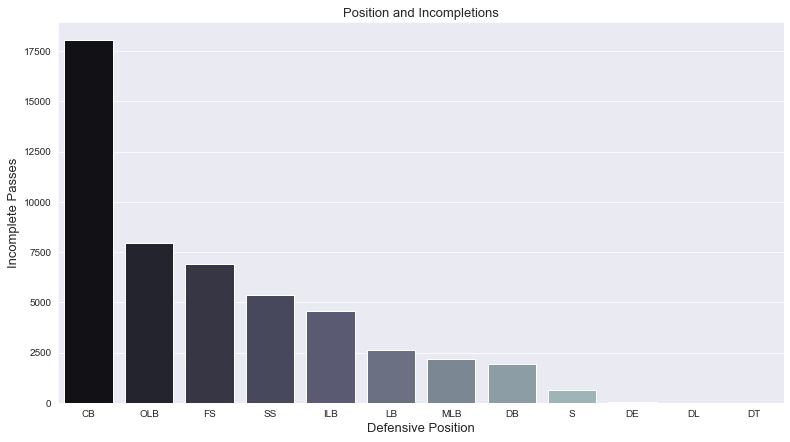

In [6]:
plt.rcParams['figure.figsize']=(13,7)
posdf = defensedf.groupby('position')['event'].sum().reset_index()
#pos20 = posdf.sort_values(by='event', ascending=False)
posdf = posdf.sort_values(by=['event'], ascending =False)
#plt.grid()
sns.set_style("darkgrid")
sns.barplot(data=posdf, x='position', y= 'event', palette='bone')
sns.color_palette('Blues')
plt.title('Position and Incompletions', fontsize=13)
plt.xlabel('Defensive Position',fontsize=13)
plt.ylabel('Incomplete Passes',fontsize=13)
posdf

In [7]:
cbdf = defensedf[defensedf['position'] == 'CB']
olbdf = defensedf[defensedf['position'] == 'OLB']
ssdf = defensedf[defensedf['position'] == 'SS']
fsdf = defensedf[defensedf['position'] == 'FS']
ilbdf = defensedf[defensedf['position'] == 'ILB']

def get_viz(df):
    agedf = df.groupby('age')['event'].sum().reset_index()
    agedf = agedf.sort_values(by='event', ascending=False).head(7)
    sns.barplot(data=agedf, x='age', y= 'event', palette = 'mako')
    plt.title('Age and Incompletions', fontsize=13)
    plt.xlabel('age', fontsize=13)
    plt.ylabel('Incomplete Passes', fontsize=13)
    plt.show()

    ### College
    collegedf = df.groupby('collegeName')['event'].sum().reset_index()
    college20 = collegedf.sort_values(by='event', ascending=False).head(7)
    sns.barplot(data=college20, x='collegeName', y= 'event',palette='mako' )
    plt.title('College and Incompletions', fontsize=13)
    plt.xlabel('College', fontsize=13)
    plt.ylabel('Incomplete Passes', fontsize=13)
    #plt.xticks(rotation=30)
    plt.show()

    ### Height
    heightdf = df.groupby('height')['event'].sum().reset_index()
    heightdf = heightdf.sort_values(by='event', ascending=False).head(7)
    sns.barplot(data=heightdf, x='height', y= 'event', palette='mako')
    plt.title('Height and Incompletions', fontsize=13)
    plt.xlabel('height', fontsize=13)
    plt.ylabel('Incomplete Passes', fontsize=13)
    plt.xticks(rotation=30)
    plt.show()

    ### Weight
    weightdf = df.groupby('weight')['event'].sum().reset_index()
    weight20 = weightdf.sort_values(by='event', ascending=False).head(7)
    sns.barplot(data=weight20, x='weight', y= 'event', palette='mako')
    plt.title('Weight and Incompletions', fontsize=13)
    plt.xlabel('Weight', fontsize=13)
    plt.ylabel('Incomplete Passes', fontsize=13)
    plt.xticks(rotation=30)
    plt.show()

# Cornerbacks

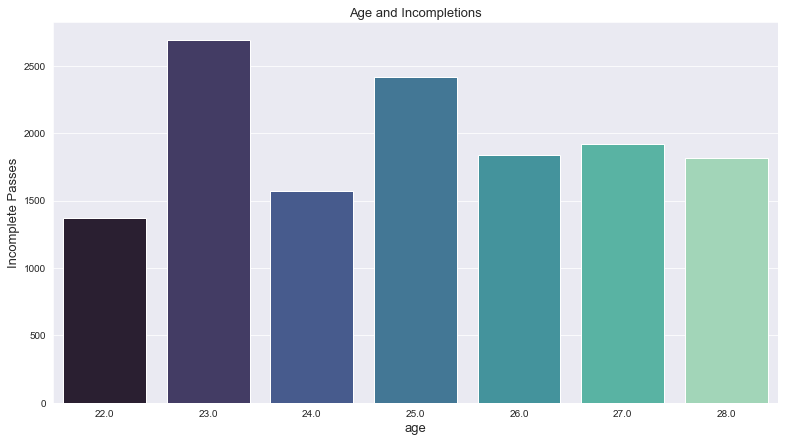

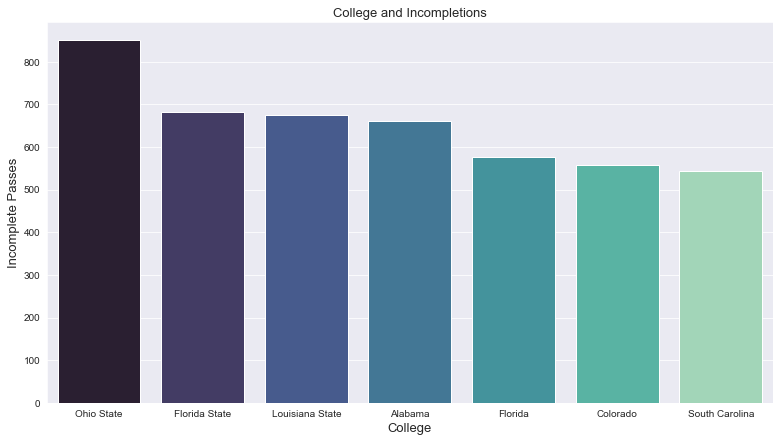

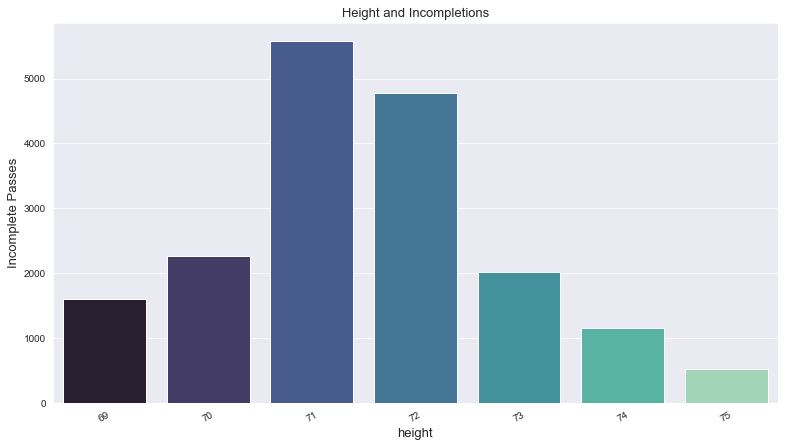

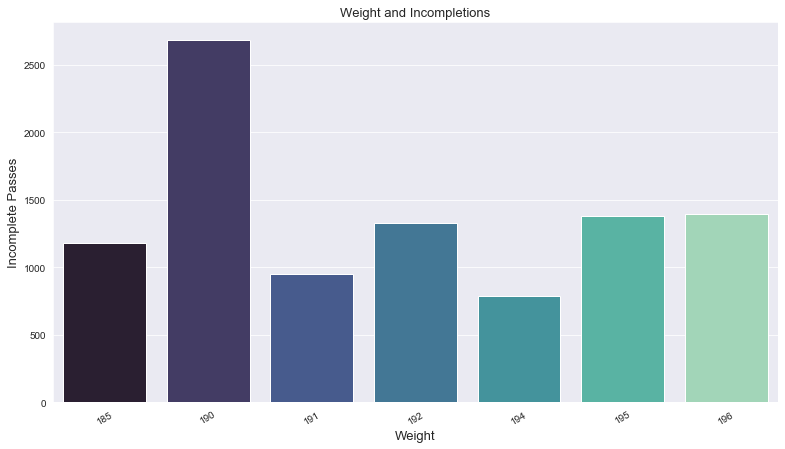

In [34]:
get_viz(cbdf)

In [26]:
### Cornerback College Percentages
collegedf = cbdf.groupby('collegeName')['event'].sum().reset_index()
college20 = collegedf.sort_values(by='event', ascending=False).head(7)
college20['percent'] = (college20['event'] / college20['event'].sum()) * 100
college20.round()

,collegeName,event,percent
64,Ohio State,850,19.0
21,Florida State,682,15.0
34,Louisiana State,676,15.0
0,Alabama,660,15.0
19,Florida,577,13.0
14,Colorado,557,12.0
80,South Carolina,544,12.0


In [27]:
### Outside Linebacker College Percentages
collegedf = olbdf.groupby('collegeName')['event'].sum().reset_index()
college20 = collegedf.sort_values(by='event', ascending=False).head(7)
college20['percent'] = (college20['event'] / college20['event'].sum()) * 100
college20.round()

,collegeName,event,percent
18,Georgia,650,24.0
16,Florida State,389,15.0
47,Southern California,377,14.0
26,Kentucky,371,14.0
57,UCLA,330,12.0
4,Boston College,300,11.0
59,Utah State,249,9.0


In [28]:
### Free Safety College Percentages
collegedf = fsdf.groupby('collegeName')['event'].sum().reset_index()
college20 = collegedf.sort_values(by='event', ascending=False).head(7)
college20['percent'] = (college20['event'] / college20['event'].sum()) * 100
college20.round()

,collegeName,event,percent
44,Utah,436,19.0
37,Rutgers,396,17.0
0,Alabama,391,17.0
39,South Carolina,334,14.0
33,Ohio State,307,13.0
36,Penn State,235,10.0
17,Louisiana State,216,9.0


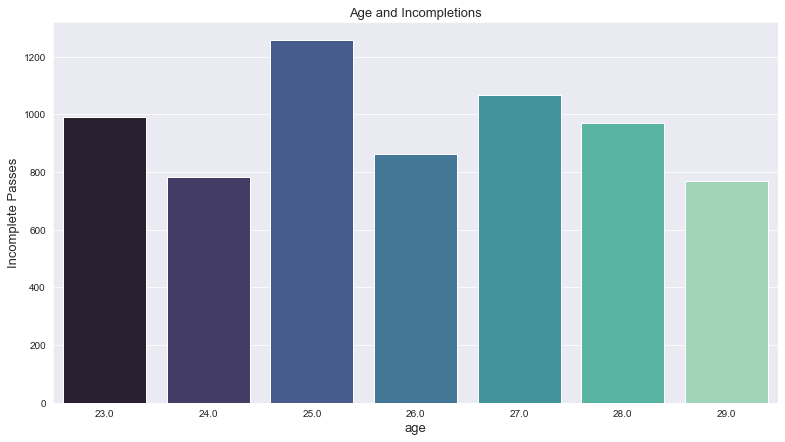

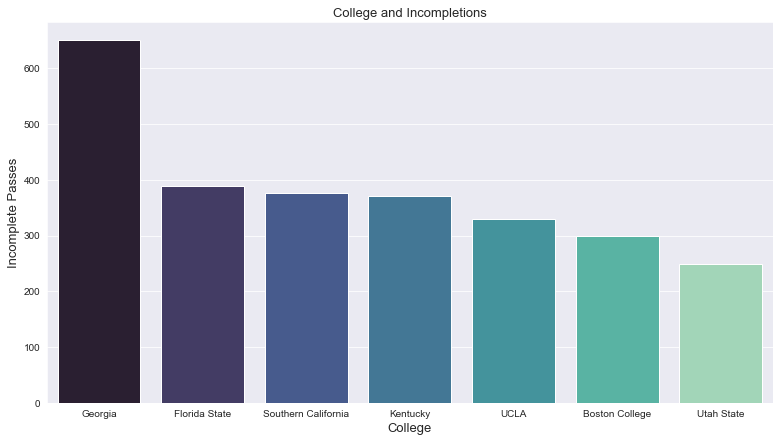

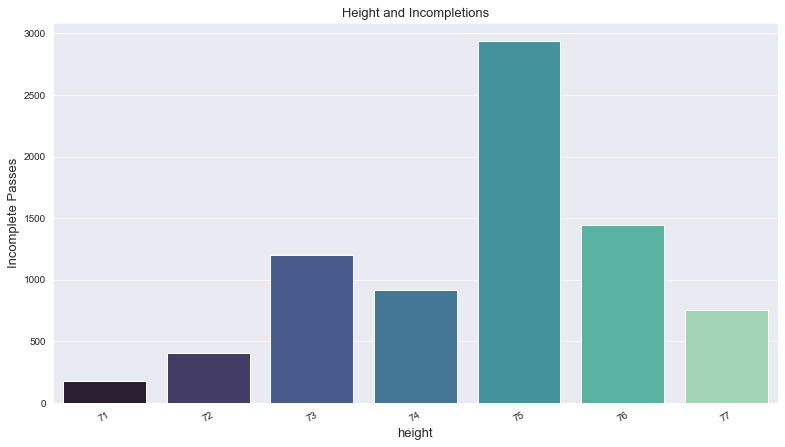

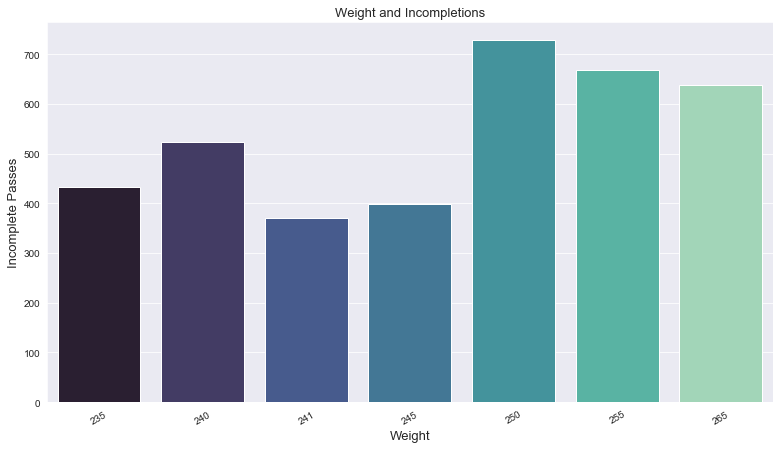

In [35]:
get_viz(olbdf)

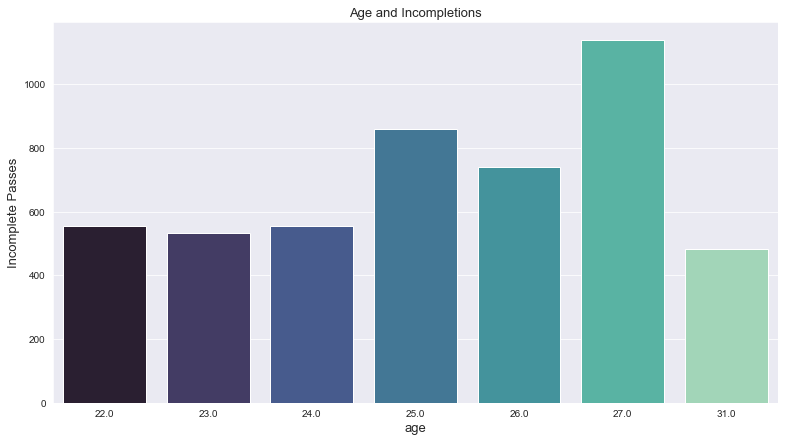

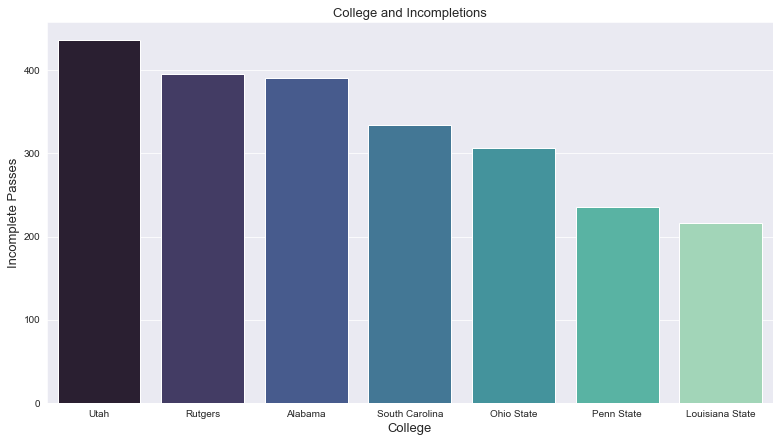

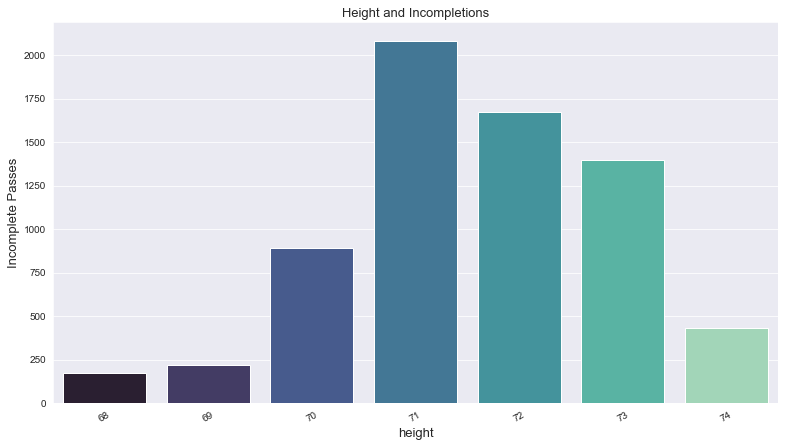

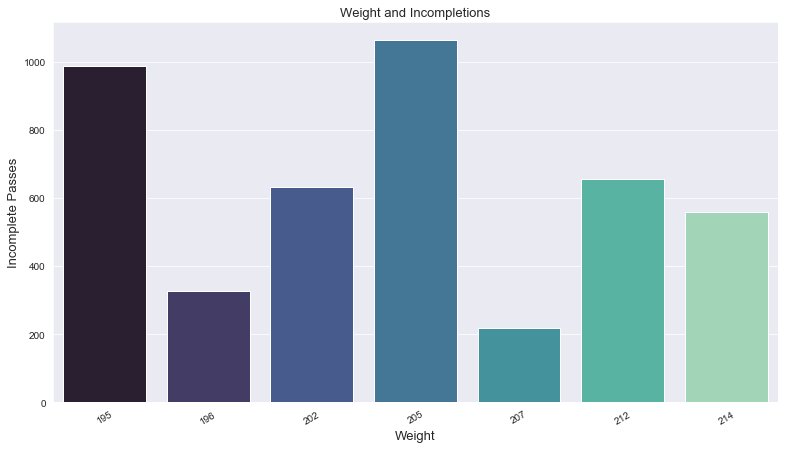

In [36]:
get_viz(fsdf)

In [37]:
plays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,2018122200,2300,(7:53) J.Johnson pass incomplete short left [K...,3,2,5,WAS,play_type_unknown,WAS,31,...,NaN,NaN,NaN,DH,TEN 24,I,0,5,0.848703,False
19235,2018122200,3177,(6:53) (Shotgun) B.Gabbert pass incomplete sho...,4,3,7,TEN,play_type_unknown,WAS,37,...,NaN,NaN,NaN,DH,WAS 31,I,0,5,1.227695,False
19236,2018122201,566,(5:32) (Shotgun) P.Rivers pass deep right to K...,1,3,4,LAC,play_type_unknown,LAC,49,...,NaN,NaN,NaN,OPI,LAC 13,C,27,-10,-0.720168,False
19237,2018122201,1719,(1:08) P.Rivers pass incomplete deep middle to...,2,3,1,LAC,play_type_unknown,LAC,48,...,NaN,NaN,NaN,DPI,BAL 23,I,0,15,1.336078,True


In [38]:
plays = plays[plays.playType == 'play_type_pass']
plays['passResult'].replace({'C': 0,'I' : 1, 'IN' : 1}, inplace=True)

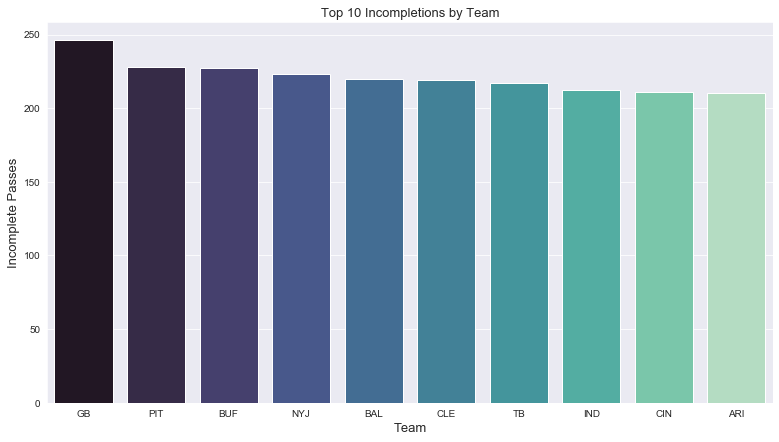

In [45]:
teamrank = plays.groupby('possessionTeam')['passResult'].sum().reset_index()
teamrank = teamrank.sort_values(by='passResult', ascending=False).head(10)
sns.barplot(data=teamrank, x='possessionTeam', y= 'passResult',palette='mako' )
plt.title('Top 10 Incompletions by Team', fontsize=13)
plt.xlabel('Team', fontsize=13)
plt.ylabel('Incomplete Passes', fontsize=13)
#plt.xticks(rotation=30)
plt.show()

In [44]:
teamrank

,possessionTeam,passResult
11,GB,246
26,PIT,228
3,BUF,227
23,NYJ,223
2,BAL,220
7,CLE,219
29,TB,217
13,IND,212
6,CIN,211
0,ARI,210


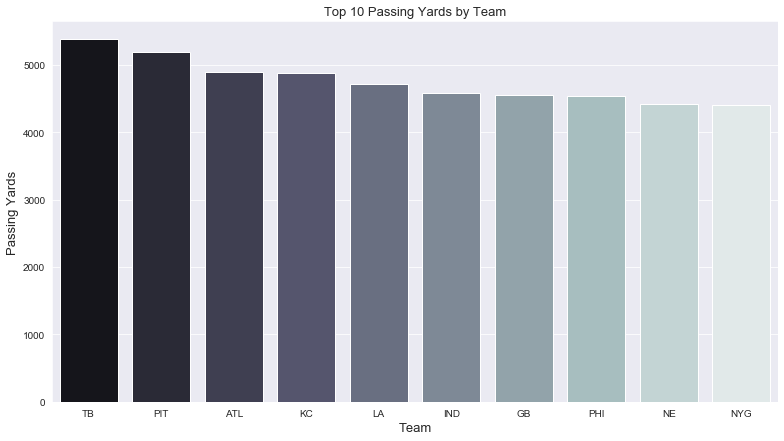

In [56]:
teampass = plays.groupby('possessionTeam')['offensePlayResult'].sum().reset_index()
teampass = teampass.sort_values(by='offensePlayResult', ascending=False).head(10)
sns.barplot(data=teampass, x='possessionTeam', y= 'offensePlayResult',palette='bone')
plt.title('Top 10 Passing Yards by Team', fontsize=13)
plt.xlabel('Team', fontsize=13)
plt.ylabel('Passing Yards', fontsize=13)
#plt.xticks(rotation=30)
plt.show()

In [57]:
teampass

,possessionTeam,offensePlayResult
29,TB,5375
26,PIT,5189
1,ATL,4891
15,KC,4878
16,LA,4709
13,IND,4587
11,GB,4548
25,PHI,4534
20,NE,4422
22,NYG,4398
